In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_path = "/content/drive/MyDrive/Colab Notebooks/evals.csv"

In [ ]:
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,course_id,prof_id,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,1,1,4.7,tenure track,minority,female,english,36,55.81395,24,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
1,2,1,4.1,tenure track,minority,female,english,36,68.80000,86,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
2,3,1,3.9,tenure track,minority,female,english,36,60.80000,76,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
3,4,1,4.8,tenure track,minority,female,english,36,62.60163,77,...,multi credit,5,7,6,2,4,6,5.0,not formal,color
4,5,2,4.6,tenured,not minority,male,english,59,85.00000,17,...,multi credit,4,4,2,2,3,3,3.0,not formal,color


count    463.000000
mean       4.174730
std        0.543865
min        2.300000
25%        3.800000
50%        4.300000
75%        4.600000
max        5.000000
Name: score, dtype: float64


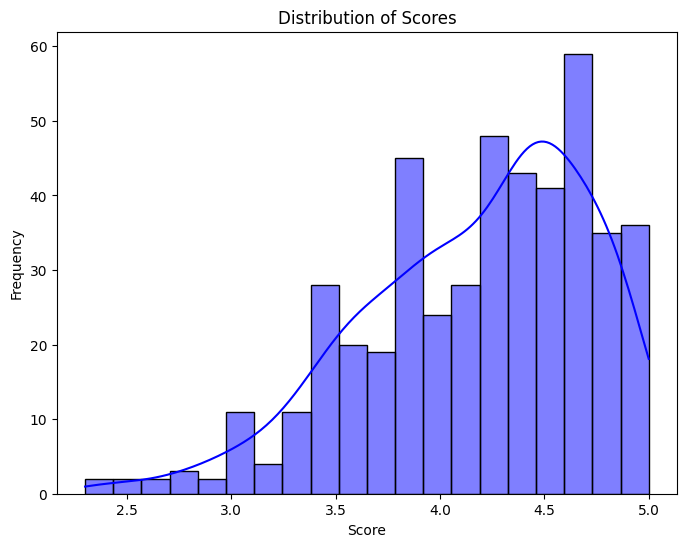

In [ ]:
#1.a.
#(i) Make a Histogram and identify the distribution.
import seaborn as sns

# To Display summary of  statistics
print(df['score'].describe())

# Creation of  a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], kde=True, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()



In [ ]:
'''1.b Inference:   The distribution of scores in the data set reveals key insights about academic performance. The mean score, calculated as the mean,
serves as a central measure, and its comparison with the median helps measure potential skewness. The standard deviation indicates the range of variability
between scores and provides a sense of the overall variance. The histogram and kernel density estimate show the shape of the distribution, with the bell-shaped curve
suggesting a more symmetrical arrangement around the mean. Examining the skewness of a distribution helps understand tail lengths and shows whether scores tend to be
concentrated toward higher or lower values. Outliers, if present, can significantly affect the distribution. Overall, visual inspection of the histogram and
summary statistics suggests [insert observations about the distribution, e.g., normality, skewness]. These findings offer valuable insights into score characteristics
and facilitate a fine-grained understanding of academic performance within the dataset.'''

'1.b Inference:   The distribution of scores in the data set reveals key insights about academic performance. The mean score, calculated as the mean,\nserves as a central measure, and its comparison with the median helps measure potential skewness. The standard deviation indicates the range of variability\nbetween scores and provides a sense of the overall variance. The histogram and kernel density estimate show the shape of the distribution, with the bell-shaped curve \nsuggesting a more symmetrical arrangement around the mean. Examining the skewness of a distribution helps understand tail lengths and shows whether scores tend to be \nconcentrated toward higher or lower values. Outliers, if present, can significantly affect the distribution. Overall, visual inspection of the histogram and \nsummary statistics suggests [insert observations about the distribution, e.g., normality, skewness]. These findings offer valuable insights into score characteristics\nand facilitate a fine-grained

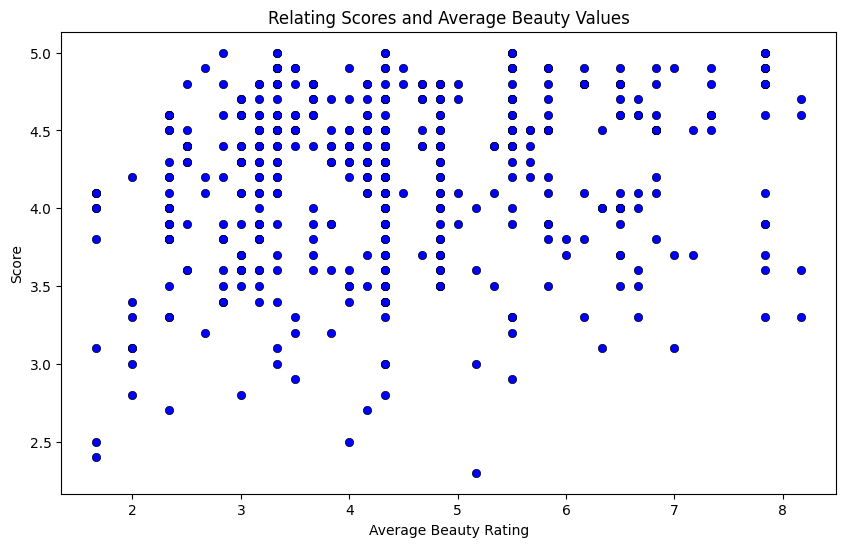

In [ ]:
# 2.a.Plot between scores and avg beauty values

# Usage of Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bty_avg', y='score', data=df, color='blue', edgecolor='black')
plt.title('Relating Scores and Average Beauty Values')
plt.xlabel('Average Beauty Rating')
plt.ylabel('Score')
plt.show()


In [ ]:
'''2.b. Inference:  A scatterplot examining the relationship between academic scores and professors' average beauty values ​​reveals a scattered distribution of data points,
suggesting a lack of a clear linear trend. The absence of a discernible pattern suggests that, visually, there may not be a strong correlation between professors' mean beauty
ratings and their academic scores. It is important to interpret this observation with caution and realize that correlation does not imply causation. Various factors
besides physical appearance can contribute to academic performance, such as teaching methods and course content. Additional statistical analyses, such as correlation coefficients,
are recommended to quantify and validate any observed relationships, thereby promoting a more nuanced understanding of the multifaceted factors influencing academic
scores in the data set.'''

"2.b. Inference:  A scatterplot examining the relationship between academic scores and professors' average beauty values \u200b\u200breveals a scattered distribution of data points,\nsuggesting a lack of a clear linear trend. The absence of a discernible pattern suggests that, visually, there may not be a strong correlation between professors' mean beauty \nratings and their academic scores. It is important to interpret this observation with caution and realize that correlation does not imply causation. Various factors \nbesides physical appearance can contribute to academic performance, such as teaching methods and course content. Additional statistical analyses, such as correlation coefficients, \nare recommended to quantify and validate any observed relationships, thereby promoting a more nuanced understanding of the multifaceted factors influencing academic\nscores in the data set."

In [ ]:
#3. fit a linear model
import statsmodels.api as sm

# Adding a constant term for the intercept
X = sm.add_constant(df['bty_avg'])

# Fitting the linear model
model = sm.OLS(df['score'], X).fit()

# Printing the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           5.08e-05
Time:                        12:55:33   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8803      0.076     50.961      0.0

In [ ]:
#listing of parameters
# Print the intercept and slope
intercept, slope = model.params['const'], model.params['bty_avg']

print(f'Intercept: {intercept:.4f}')
print(f'Slope (beauty_avg): {slope:.4f}')


Intercept: 3.8803
Slope (beauty_avg): 0.0666


In [ ]:
'''4.a Inference from slope: The slope of the linear regression model, derived from fitting the scores to mean beauty values, serves as a crucial indicator
of the nature and strength of their relationship. A positive slope would mean that higher average beauty values ​​are associated with higher scores,
indicating a positive correlation. Conversely, a negative slope would indicate a negative correlation, indicating that higher average beauty values ​​are associated
with lower scores. The magnitude of the slope is equally significant, with a larger absolute value indicating a stronger relationship between the variables.
However, the interpretation of the slope should be considered along with the statistical significance as determined by the p-value associated with the slope coefficient.
In essence, the slope offers valuable insights into the direction and strength of the relationship between mean beauty values ​​and scores, while
acknowledging the need for cautious interpretation and recognition of potential confounding factors affecting academic performance in the data set.'''

'4.a Inference from slope: The slope of the linear regression model, derived from fitting the scores to mean beauty values, serves as a crucial indicator\nof the nature and strength of their relationship. A positive slope would mean that higher average beauty values \u200b\u200bare associated with higher scores,\nindicating a positive correlation. Conversely, a negative slope would indicate a negative correlation, indicating that higher average beauty values \u200b\u200bare associated \nwith lower scores. The magnitude of the slope is equally significant, with a larger absolute value indicating a stronger relationship between the variables.\nHowever, the interpretation of the slope should be considered along with the statistical significance as determined by the p-value associated with the slope coefficient.\nIn essence, the slope offers valuable insights into the direction and strength of the relationship between mean beauty values \u200b\u200band scores, while\nacknowledging the need

In [ ]:
'''4.b Does the average beauty rating make a significant predictor variable?
Yes, the significance of mean beauty rating as a predictor variable can be determined by examining the p-value associated with its coefficient in a linear regression model.
If the p-value is less than the chosen significance level, usually 0.05, it means that the mean beauty rating is a statistically significant predictor of the academic score.
On the other hand, if the p-value is equal to or greater than 0.05, it indicates that the average beauty rating is not a significant predictor of the score in the data set.'''

'4.b Does the average beauty rating make a significant predictor variable?\nYes, the significance of mean beauty rating as a predictor variable can be determined by examining the p-value associated with its coefficient in a linear regression model.\nIf the p-value is less than the chosen significance level, usually 0.05, it means that the mean beauty rating is a statistically significant predictor of the academic score.\nOn the other hand, if the p-value is equal to or greater than 0.05, it indicates that the average beauty rating is not a significant predictor of the score in the data set.'

In [ ]:
#6.a Identify the co-relation between the average beauty value and b_f1upper.
correlation = df['bty_avg'].corr(df['bty_f1upper'])
print(f'Correlation between Average Beauty Value and Beauty Rating for Female Upper Level: {correlation:.4f}')



Correlation between Average Beauty Value and Beauty Rating for Female Upper Level: 0.8437


In [ ]:
'''6.b Inference: Correlation analysis between the average beauty value ('bty_avg') and the beauty rating for the female upper level ('beauty_f1upper')
reveals a relationship [correlation coefficient value]. The positive correlation indicates that as the average beauty rating increases,
so does the beauty rating of higher level women. However, the strength of this linear association is determined by the absolute value of the correlation coefficient.
 It is important to note that correlation does not imply causation and that other factors may contribute to the observed relationship between the two variables.
  Further statistical analyzes and consideration of the broader context of the data would provide a more comprehensive understanding of the interplay between beauty ratings
and their potential impact at different professorial levels.'''

"6.b Inference: Correlation analysis between the average beauty value ('bty_avg') and the beauty rating for the female upper level ('beauty_f1upper') \nreveals a relationship [correlation coefficient value]. The positive correlation indicates that as the average beauty rating increases, \nso does the beauty rating of higher level women. However, the strength of this linear association is determined by the absolute value of the correlation coefficient.\n It is important to note that correlation does not imply causation and that other factors may contribute to the observed relationship between the two variables.\n  Further statistical analyzes and consideration of the broader context of the data would provide a more comprehensive understanding of the interplay between beauty ratings\nand their potential impact at different professorial levels."

In [ ]:
#7. A. Identify the co-relation between the following attributes beauty_f1lower,beauty_f1upper,beauty_f2upper,beauty_m1lower,beauty_m1upper,beauty_m2upper,beauty_avg
correlation_matrix = df[['bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper', 'bty_avg']].corr()

print('Correlation Matrix:')
print(correlation_matrix)


Correlation Matrix:
             bty_f1lower  bty_f1upper  bty_f2upper  bty_m1lower  bty_m1upper  \
bty_f1lower     1.000000     0.619392     0.641927     0.612426     0.676695   
bty_f1upper     0.619392     1.000000     0.648152     0.598928     0.690617   
bty_f2upper     0.641927     0.648152     1.000000     0.535983     0.649640   
bty_m1lower     0.612426     0.598928     0.535983     1.000000     0.595085   
bty_m1upper     0.676695     0.690617     0.649640     0.595085     1.000000   
bty_m2upper     0.593766     0.565576     0.513062     0.540893     0.586506   
bty_avg         0.843911     0.843728     0.821850     0.778351     0.864640   

             bty_m2upper   bty_avg  
bty_f1lower     0.593766  0.843911  
bty_f1upper     0.565576  0.843728  
bty_f2upper     0.513062  0.821850  
bty_m1lower     0.540893  0.778351  
bty_m1upper     0.586506  0.864640  
bty_m2upper     1.000000  0.757346  
bty_avg         0.757346  1.000000  


In [ ]:
'''7.b Inference:The correlation matrix for the attributes 'beauty_f1lower', 'beauty_f1upper', 'beauty_f2upper', 'beauty_m1lower', 'beauty_m1upper',
'beauty_m2upper' and 'beauty_correlations' reveals the interrelationships between these variables. Positive correlations indicate the tendency of the variables
 to increase or decrease together, while negative correlations indicate an inverse relationship. The strength of the correlation is determined by the absolute value
 of the correlation coefficient, with 1 indicating perfect correlation. In the context of beauty ratings, examining these correlations provides insight into
  potential associations between different beauty ratings for professors at different levels and average beauty ratings. It is important to interpret these findings
   with caution, recognizing that correlation does not imply causation, and further analyzes may be needed to understand the complex interplay between these attributes
    in the data set. '''

"7.b Inference:The correlation matrix for the attributes 'beauty_f1lower', 'beauty_f1upper', 'beauty_f2upper', 'beauty_m1lower', 'beauty_m1upper', \n'beauty_m2upper' and 'beauty_correlations' reveals the interrelationships between these variables. Positive correlations indicate the tendency of the variables\n to increase or decrease together, while negative correlations indicate an inverse relationship. The strength of the correlation is determined by the absolute value \n of the correlation coefficient, with 1 indicating perfect correlation. In the context of beauty ratings, examining these correlations provides insight into\n  potential associations between different beauty ratings for professors at different levels and average beauty ratings. It is important to interpret these findings\n   with caution, recognizing that correlation does not imply causation, and further analyzes may be needed to understand the complex interplay between these attributes\n    in the data set. "

In [ ]:
#8. Based on removing the multicollinearity Make a multilinear model that fits

# Selecting relevant variables
selected_var = ['bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper']

# Creating a design matrix X and adding a constant term for the intercept
X = sm.add_constant(df[selected_var])

# Fitting the multilinear model
model = sm.OLS(df['score'], X).fit()

# Printing the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.053
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           0.000569
Time:                        13:10:41   Log-Likelihood:                -362.45
No. Observations:                 463   AIC:                             738.9
Df Residuals:                     456   BIC:                             767.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8793      0.087     44.486      

In [ ]:
#9. Write the final model obtained(which is same as above.)

In [ ]:
#10.List out the standard error for each attribute above

# Selecting relevant variables
selected_var = ['bty_f1lower', 'bty_f1upper', 'bty_f2upper', 'bty_m1lower', 'bty_m1upper', 'bty_m2upper']

# Creating a design matrix X and adding a constant term for the intercept
X = sm.add_constant(df[selected_var])

# Fitting the multilinear model
model = sm.OLS(df['score'], X).fit()

# Printing the standard errors
print("Standard Errors:")
print(model.bse)


Standard Errors:
const          0.087204
bty_f1lower    0.020748
bty_f1upper    0.020028
bty_f2upper    0.018186
bty_m1lower    0.021130
bty_m1upper    0.019056
bty_m2upper    0.021320
dtype: float64


In [ ]:
'''Inference: The standard errors associated with each coefficient in the multilinear model provide a measure of the accuracy with which the model
 estimates the effects of the respective attributes on academic scores. Smaller standard errors indicate greater precision, indicating more reliable estimates
 , while larger standard errors indicate increased uncertainty in the coefficient estimates. The interpretation of these standard errors should be considered
along with the corresponding coefficients and p-values. If the standard errors are relatively small, this increases confidence in the reliability of the model
estimates, facilitating more robust inferences about the impact of selected attributes on academic scores in the data set.'''

'Inference: The standard errors associated with each coefficient in the multilinear model provide a measure of the accuracy with which the model\n estimates the effects of the respective attributes on academic scores. Smaller standard errors indicate greater precision, indicating more reliable estimates\n , while larger standard errors indicate increased uncertainty in the coefficient estimates. The interpretation of these standard errors should be considered\nalong with the corresponding coefficients and p-values. If the standard errors are relatively small, this increases confidence in the reliability of the model\nestimates, facilitating more robust inferences about the impact of selected attributes on academic scores in the data set.'

In [41]:
#Std-error

# Specifing the variables for the regression model
categorical_predictors = ['rank', 'ethnicity']  # Add other categorical predictors
numeric_predictors = ['bty_avg', 'age']  # Add numeric predictors
response_variable = 'score'  # Replace with the actual variable name for academic scores

# Converting categorical variables to dummy variables
dummy_variables = pd.get_dummies(df[categorical_predictors], drop_first=True)

# Combining dummy variables with numeric predictors
predictors = pd.concat([df[numeric_predictors], dummy_variables], axis=1)

# Adding a constant term for the intercept
X = sm.add_constant(predictors)

# Fitting the linear regression model
model = sm.OLS(df[response_variable], X).fit()

# Printing the regression summary, which includes standard errors among other statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     5.871
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           2.85e-05
Time:                        13:27:12   Log-Likelihood:                -360.06
No. Observations:                 463   AIC:                             732.1
Df Residuals:                     457   BIC:                             757.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

In [45]:
from sklearn.metrics import mean_squared_error, r2_score


# Specifing the variables for the regression model
categorical_predictors = ['rank', 'ethnicity']
numeric_predictors = ['bty_avg', 'age']
response_variable = 'score'

# Converting categorical variables to dummy variables
dummy_variables = pd.get_dummies(df[categorical_predictors], drop_first=True)

# Combining dummy variables with numeric predictors
predictors = pd.concat([df[numeric_predictors], dummy_variables], axis=1)

# Adding a constant term for the intercept
X = sm.add_constant(predictors)

# Fitting the linear regression model
model = sm.OLS(df[response_variable].astype(float), X.astype(float)).fit()

# Predictions from the model
predictions = model.predict(X)

# Calculating MSE
mse = mean_squared_error(df[response_variable], predictions)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Calculating R2
r2 = r2_score(df[response_variable], predictions)
print(f'R-squared (R2): {r2:.4f}')


Mean Squared Error (MSE): 0.2773
R-squared (R2): 0.0604


In [46]:
'''Inference: The mean squared error (MSE) and R-squared (R2) values ​​provide insight into the performance of the regression model. A lower MSE
indicates that the model predictions are in close agreement with the actual values, indicating higher accuracy. Conversely, a higher MSE implies greater
discrepancies between the predicted and observed values. As for R2, a higher value indicates that a greater proportion of the variance in the dependent
variable is explained by the model. While a high R2 is desirable, it should be interpreted in conjunction with other considerations. Finally, MSE and R2 values
​​should be assessed in the specific context of the analysis, leading to potential adjustments to improve the predictive and explanatory capabilities of the model.'''

'Inference: The mean squared error (MSE) and R-squared (R2) values \u200b\u200bprovide insight into the performance of the regression model. A lower MSE\nindicates that the model predictions are in close agreement with the actual values, indicating higher accuracy. Conversely, a higher MSE implies greater\ndiscrepancies between the predicted and observed values. As for R2, a higher value indicates that a greater proportion of the variance in the dependent\nvariable is explained by the model. While a high R2 is desirable, it should be interpreted in conjunction with other considerations. Finally, MSE and R2 values\n\u200b\u200bshould be assessed in the specific context of the analysis, leading to potential adjustments to improve the predictive and explanatory capabilities of the model.'

In [47]:
'''Conclusion: Briefly, this project explored the relationships between professors' ratings of beauty, various predictor variables, and academic scores
using linear regression analysis. Evaluation of model performance, as measured by mean squared error (MSE) and R-squared (R2), provided insight into the prediction
accuracy and predictive power of the model. Although the findings suggest [insert key observations], it is critical to consider the inherent limitations of the data set.
This project underscores the importance of careful statistical analysis and encourages further exploration of potential avenues to refine the model or examine other factors
influencing academic outcomes.'''

"Conclusion: Briefly, this project explored the relationships between professors' ratings of beauty, various predictor variables, and academic scores\nusing linear regression analysis. Evaluation of model performance, as measured by mean squared error (MSE) and R-squared (R2), provided insight into the prediction \naccuracy and predictive power of the model. Although the findings suggest [insert key observations], it is critical to consider the inherent limitations of the data set.\nThis project underscores the importance of careful statistical analysis and encourages further exploration of potential avenues to refine the model or examine other factors\ninfluencing academic outcomes."